In [11]:
import numpy as np
import pandas as pd

from stochastic_volatility_models.src.models.rough_bergomi import simulate
from stochastic_volatility_models.src.core.pricing_models import PricingModel
from stochastic_volatility_models.src.core.underlying import Underlying
from stochastic_volatility_models.src.core.volatility_surface import VolatilitySurface

In [16]:
ticker = "SPX"
spx = Underlying(ticker)
vix = Underlying("VIX")
pricing_model = PricingModel()
time = np.datetime64("2022-03-03")

In [13]:
expiries = np.array(
	["2022-03-04", "2022-03-09", "2022-03-11", "2022-03-18", "2022-03-23", "2022-03-25", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-08", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31"], dtype=np.datetime64
)

strikes = np.array(
	[
		2200,
		2400,
		2600,
		2800,
		3000,
		3200,
		3400,
		3500,
		3600,
		3700,
		3800,
		3850,
		3900,
		3950,
		3975,
		4000,
		4025,
		4040,
		4050,
		4060,
		4070,
		4075,
		4080,
		4090,
		4100,
		4110,
		4120,
		4125,
		4130,
		4140,
		4150,
		4160,
		4170,
		4175,
		4180,
		4190,
		4200,
		4210,
		4220,
		4225,
		4230,
		4240,
		4250,
		4260,
		4270,
		4275,
		4280,
		4290,
		4300,
		4310,
		4320,
		4325,
		4330,
		4340,
		4350,
		4360,
		4370,
		4375,
		4380,
		4390,
		4400,
		4410,
		4420,
		4425,
		4430,
		4440,
		4450,
		4460,
		4470,
		4475,
		4480,
		4490,
		4500,
		4510,
		4525,
		4550,
		4600,
		4650,
		4700,
		4800,
		5000,
		5200,
		5400,
	]
)
spx_vs = VolatilitySurface(
	underlying=spx,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

In [14]:
expiries = np.array(["2022-03-09", "2022-03-23", "2022-03-30", "2022-04-06"], dtype=np.datetime64)

strikes = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
vix_vs = VolatilitySurface(
	underlying=vix,
	expiries=expiries,
	strikes=strikes,
	monthly=False,
)

12.50626722722437


<Axes: >

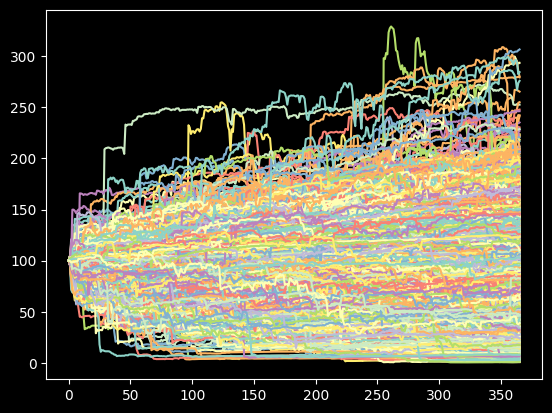

In [4]:
spot = 100
strike = 100
parameters = {
	"hurst_index": 0.93,
	"wiener_correlation": -0.9,
	"volatility_of_volatility": 1.9,
}

price_process, variance_process, parallel_price_process = simulate(
	spot=spot,
	initial_variance=0.235**2,
	**parameters,
	simulation_length=1,
	steps_per_year=365,
	num_paths=2**13,
)

price = np.mean(np.maximum(price_process[:, -1] - strike, 0))
print(price)

pd.DataFrame(price_process.T).plot(legend=False)

In [28]:
time_grid = np.linspace(start=0, stop=1, num=1 + 252 * 1)[np.newaxis, :]
time_grid[0]

array([0.        , 0.00396825, 0.00793651, 0.01190476, 0.01587302,
       0.01984127, 0.02380952, 0.02777778, 0.03174603, 0.03571429,
       0.03968254, 0.04365079, 0.04761905, 0.0515873 , 0.05555556,
       0.05952381, 0.06349206, 0.06746032, 0.07142857, 0.07539683,
       0.07936508, 0.08333333, 0.08730159, 0.09126984, 0.0952381 ,
       0.09920635, 0.1031746 , 0.10714286, 0.11111111, 0.11507937,
       0.11904762, 0.12301587, 0.12698413, 0.13095238, 0.13492063,
       0.13888889, 0.14285714, 0.1468254 , 0.15079365, 0.1547619 ,
       0.15873016, 0.16269841, 0.16666667, 0.17063492, 0.17460317,
       0.17857143, 0.18253968, 0.18650794, 0.19047619, 0.19444444,
       0.1984127 , 0.20238095, 0.20634921, 0.21031746, 0.21428571,
       0.21825397, 0.22222222, 0.22619048, 0.23015873, 0.23412698,
       0.23809524, 0.24206349, 0.24603175, 0.25      , 0.25396825,
       0.25793651, 0.26190476, 0.26587302, 0.26984127, 0.27380952,
       0.27777778, 0.28174603, 0.28571429, 0.28968254, 0.29365

In [17]:
from stochastic_volatility_models.src.data.rates import get_risk_free_interest_rate
from stochastic_volatility_models.src.data.dividends import get_dividend_yield


t2x = np.linspace(start=0, stop=1, num=1 + 252)
r = get_risk_free_interest_rate(time, t2x)
q = get_dividend_yield(spx, time, spx_vs.expiries, monthly=False)

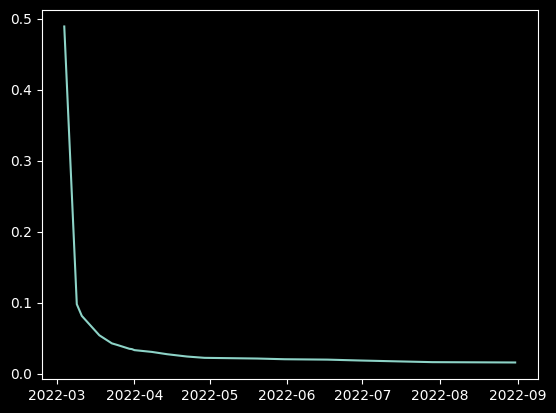

In [21]:
import matplotlib.pyplot as plt

plt.plot(spx_vs.expiries, q)